In [166]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
#input code citation --> https://colab.research.google.com/drive/1DofKEdQYaXmDWBzuResXWWvxhLgDeVyl
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ashu212","key":"0cca39e8464cfcb3172b4d62e5171491"}'}

In [191]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Aug 28 18:49 kaggle.json


In [192]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [193]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [194]:
# List available datasets.
!kaggle datasets list

ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/house-rent-prediction-dataset      House Rent Prediction Dataset               82KB  2022-08-20 13:49:03           4236        142  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts  McDonald's India : Menu Nutrition Dataset    5KB  2022-07-28 17:08:52           4005        163  0.9411765        
arianazmoudeh/airbnbopendata                         Airbnb Open Data                            10MB  2022-08-01 15:58:10           2544         85  0.9705882        
digitalbro/usa-childrens-hospitals                   USA Childrens Hospitals                     18KB  2022-08-24 02:20:09            260         23  1.0       

In [195]:
!kaggle datasets download -d chirag19/air-passengers

air-passengers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [196]:
!ls

 AirPassengers.csv   'kaggle (1).json'	 sample_data
 air-passengers.zip   kaggle.json


In [197]:
! unzip /content/air-passengers.zip -d /content/

Archive:  /content/air-passengers.zip
replace /content/AirPassengers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [198]:
import pandas as pd 
df = pd.read_csv('AirPassengers.csv')


In [199]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [200]:
a = list(df['#Passengers'])
print(a)



[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]


In [201]:
b = [0]
i=0
while i<len(a)-1:
  step = a[i+1]-a[i]
  if step == 0:
    b.append(0.1)
  else:
    b.append(step)
  i+=1


df['stepsize']=b
df.head()
#print(b)



,Month,#Passengers,stepsize
0,1949-01,112,0.0
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0


In [202]:
#make an absolute value list: 
c=[]
for i in b: 
  c.append(abs(i))

import statistics as s
harmean=[0,0]
i=1
j=2
while j<len(c):
  harsteps=s.harmonic_mean(c[i:j])
  harmean.append(harsteps)
  j+=1




In [203]:
print(harmean)

[0, 0, 6, 8.4, 5.25, 5.743589743589744, 6.511627906976744, 7.102439024390244, 0.6454718176060797, 0.7320568148489546, 0.8191545953525543, 0.9046823304780577, 0.988761172370816, 1.0472697732297636, 1.1256118056921531, 1.2052402387381196, 1.2730627973408928, 1.346505741391807, 1.4256632259604434, 1.5035215239967659, 0.8647411178776542, 0.9068145109505699, 0.9504315063348803, 0.9933240180581911, 1.036674840525852, 1.0720832963722187, 1.106864674315411, 1.1493219129667709, 1.1900196387279265, 1.2280802851939183, 1.2627098839839381, 1.3035488061545062, 0.9389927896948519, 0.9673295131514423, 0.9961897483007343, 1.0244444734723919, 1.0529888277139625, 1.0765962580390827, 1.1028371714660117, 1.130052596040716, 1.1569237505686487, 1.169245792536588, 1.1974768339573136, 1.22370521477277, 1.2498065397670226, 1.2777464129095832, 1.304681240759333, 1.3316421472453117, 1.3588029061581155, 1.367939561065475, 1.0867330626149878, 1.108296786973664, 1.1059483428151204, 1.1235727761714984, 1.14341523309

In [204]:
df['harmean of magnitude'] = harmean

In [205]:
df.head(n=144)

,Month,#Passengers,stepsize,harmean of magnitude
0,1949-01,112,0.0,0.000000
1,1949-02,118,6.0,0.000000
2,1949-03,132,14.0,6.000000
3,1949-04,129,-3.0,8.400000
4,1949-05,121,-8.0,5.250000
...,...,...,...,...
139,1960-08,606,-16.0,2.596850
140,1960-09,508,-98.0,2.612595
141,1960-10,461,-47.0,2.630886
142,1960-11,390,-71.0,2.648619


In [206]:
j=1
countofup=[0,0]
probabilityofup = [0,0]
while j<len(b)-1:
  if b[j]<0:
    countofup.append(0)
    a = sum(countofup)/j
    probabilityofup.append(a)
    j+=1
  else: 
    countofup.append(1)
    p = sum(countofup)/j
    probabilityofup.append(p)
    j+=1

print(probabilityofup)

[0, 0, 1.0, 1.0, 0.6666666666666666, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.625, 0.5555555555555556, 0.5, 0.5454545454545454, 0.5, 0.5384615384615384, 0.5714285714285714, 0.5333333333333333, 0.5, 0.5294117647058824, 0.5555555555555556, 0.5789473684210527, 0.55, 0.5238095238095238, 0.5, 0.5217391304347826, 0.5416666666666666, 0.56, 0.5769230769230769, 0.5555555555555556, 0.5714285714285714, 0.5862068965517241, 0.6, 0.6129032258064516, 0.59375, 0.5757575757575758, 0.5588235294117647, 0.5714285714285714, 0.5833333333333334, 0.5945945945945946, 0.6052631578947368, 0.5897435897435898, 0.6, 0.6097560975609756, 0.6190476190476191, 0.627906976744186, 0.6136363636363636, 0.6, 0.5869565217391305, 0.5957446808510638, 0.6041666666666666, 0.6122448979591837, 0.62, 0.6078431372549019, 0.5961538461538461, 0.6037735849056604, 0.6111111111111112, 0.6181818181818182, 0.6071428571428571, 0.5964912280701754, 0.5862068965517241, 0.5932203389830508, 0.6, 0.5901639344262295, 0.5967741935483871, 

In [207]:
df['probabilityofup'] = probabilityofup

In [208]:
df.head(n=144)

,Month,#Passengers,stepsize,harmean of magnitude,probabilityofup
0,1949-01,112,0.0,0.000000,0.000000
1,1949-02,118,6.0,0.000000,0.000000
2,1949-03,132,14.0,6.000000,1.000000
3,1949-04,129,-3.0,8.400000,1.000000
4,1949-05,121,-8.0,5.250000,0.666667
...,...,...,...,...,...
139,1960-08,606,-16.0,2.596850,0.586957
140,1960-09,508,-98.0,2.612595,0.582734
141,1960-10,461,-47.0,2.630886,0.578571
142,1960-11,390,-71.0,2.648619,0.574468


In [209]:
import random

a=list(df['#Passengers'])
b=list(df['harmean of magnitude'])
c=list(df['probabilityofup'])

pred = [0,0]
i=1
while i<143:
  if random.uniform(0,1)>c[i]:
    prediction = a[i]+(b[i+1]*-1)
    pred.append(prediction)
    i+=1
  else:
    prediction = a[i]+(b[i+1]*1)
    pred.append(prediction)
    i+=1


print(len(pred))

144


In [210]:
df['prediction']=pred

In [211]:
df.head(n=144)

,Month,#Passengers,stepsize,harmean of magnitude,probabilityofup,prediction
0,1949-01,112,0.0,0.000000,0.000000,0.000000
1,1949-02,118,6.0,0.000000,0.000000,0.000000
2,1949-03,132,14.0,6.000000,1.000000,112.000000
3,1949-04,129,-3.0,8.400000,1.000000,140.400000
4,1949-05,121,-8.0,5.250000,0.666667,134.250000
...,...,...,...,...,...,...
139,1960-08,606,-16.0,2.596850,0.586957,624.596850
140,1960-09,508,-98.0,2.612595,0.582734,608.612595
141,1960-10,461,-47.0,2.630886,0.578571,505.369114
142,1960-11,390,-71.0,2.648619,0.574468,458.351381


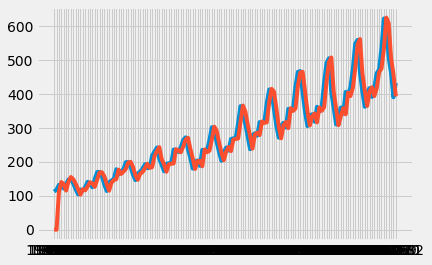

In [212]:
import matplotlib.pyplot as plt
new_df = df[['Month','#Passengers','prediction']].copy()
# Setting the Date as index
new_df = new_df.set_index("Month")

plt.style.use("fivethirtyeight")
#new_df.plot(subplots=True, figsize=(12, 15))

plt.plot(new_df["#Passengers"])
plt.plot(new_df["prediction"])

In [213]:
#MAPE
new_df['abspercent diff'] = (abs(new_df['#Passengers']-new_df['prediction'])/new_df['#Passengers']) * 100 

In [214]:
new_df.head()

,#Passengers,prediction,abspercent diff
Month,,,
1949-01,112,0.00,100.000000
1949-02,118,0.00,100.000000
1949-03,132,112.00,15.151515
1949-04,129,140.40,8.837209
1949-05,121,134.25,10.950413


In [215]:
mape = "The mape is"
print("The mape is " + str(new_df['abspercent diff'].mean()) + " %")

The mape is 10.482972110460683 %
